In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import numpy.ma as ma
from astropy.convolution import convolve
from scipy import stats
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.stats as stats
import matplotlib.pyplot as plt

mod_med = pd.read_csv('~/projects/NC_Submission/Climada_papers/Test/DEMO_ModelMedianSubregions.csv')
mod_med

,Unnamed: 0,Year,Region,D_CliExp_Pos,D_CliExp_Neg,D_1980_Pos,D_1980_Neg,D_2010_Pos,D_2010_Neg,D_obs_dummy_Pos,...,D_CliExp_Neg_onethird_quantile,D_CliExp_Neg_twothird_quantile,D_1980_Pos_onethird_quantile,D_1980_Pos_twothird_quantile,D_1980_Neg_onethird_quantile,D_1980_Neg_twothird_quantile,D_2010_Pos_onethird_quantile,D_2010_Pos_twothird_quantile,D_2010_Neg_onethird_quantile,D_2010_Neg_twothird_quantile
0,0,1971,LAM,4.023693e+08,5.285264e+08,6.360281e+08,1.047591e+09,1.251272e+09,3.859332e+09,0.000000e+00,...,3.687832e+08,1.151832e+09,5.417412e+08,7.285193e+08,7.476110e+08,2.265642e+09,1.074828e+09,1.465043e+09,2.153724e+09,7.049321e+09
1,1,1972,LAM,6.467142e+08,7.232123e+08,1.028985e+09,1.028685e+09,2.866084e+09,3.587172e+09,0.000000e+00,...,3.595028e+08,1.084149e+09,8.378755e+08,1.311003e+09,6.310323e+08,1.623574e+09,2.099250e+09,3.692527e+09,2.577915e+09,5.066493e+09
2,2,1973,LAM,8.151027e+08,1.165546e+09,1.210916e+09,1.800896e+09,3.123314e+09,6.070501e+09,0.000000e+00,...,6.909524e+08,1.911286e+09,1.111558e+09,1.556728e+09,1.080324e+09,3.017047e+09,2.812444e+09,3.762174e+09,3.798410e+09,9.475175e+09
3,3,1974,LAM,2.469297e+08,5.895776e+09,3.416155e+08,8.737634e+09,9.556804e+08,3.003573e+10,0.000000e+00,...,4.884319e+09,6.622060e+09,3.127346e+08,6.116145e+08,7.246017e+09,9.776114e+09,7.642482e+08,1.325569e+09,2.436126e+10,3.496478e+10
4,4,1975,LAM,7.356679e+08,1.252483e+09,9.627596e+08,1.854030e+09,2.283276e+09,5.245553e+09,0.000000e+00,...,6.635218e+08,1.829390e+09,6.939798e+08,1.423361e+09,9.299430e+08,2.732020e+09,1.460793e+09,3.653704e+09,3.402896e+09,7.534373e+09
5,5,1976,LAM,5.690548e+08,1.089701e+09,7.273545e+08,1.525657e+09,1.588228e+09,4.114654e+09,0.000000e+00,...,8.693011e+08,1.837960e+09,4.706032e+08,1.768818e+09,1.217419e+09,2.594562e+09,1.044985e+09,3.673838e+09,3.100373e+09,6.283568e+09
6,6,1977,LAM,5.887558e+08,7.184427e+08,6.765118e+08,8.721162e+08,1.528850e+09,3.321514e+09,0.000000e+00,...,6.385416e+08,7.927636e+08,6.214238e+08,7.367437e+08,7.746534e+08,9.972082e+08,1.479644e+09,1.741990e+09,2.832951e+09,3.667434e+09
7,7,1978,LAM,5.674043e+08,1.005163e+09,6.727797e+08,1.187181e+09,1.539537e+09,3.648889e+09,0.000000e+00,...,8.895946e+08,1.542610e+09,4.567761e+08,1.356205e+09,1.071408e+09,1.830328e+09,9.577014e+08,3.106723e+09,2.920028e+09,6.619550e+09
8,8,1979,LAM,9.428826e+08,6.272667e+09,1.009824e+09,6.594910e+09,2.677416e+09,2.195303e+10,0.000000e+00,...,6.120509e+09,6.469786e+09,7.945767e+08,1.244181e+09,6.397543e+09,6.764037e+09,1.861484e+09,3.518487e+09,2.132657e+10,2.279633e+10
9,9,1980,LAM,6.909657e+08,6.501249e+09,6.909657e+08,6.501249e+09,1.854897e+09,2.347668e+10,1.078941e+09,...,5.976350e+09,6.669167e+09,6.875338e+08,7.237071e+08,5.976350e+09,6.669167e+09,1.817068e+09,1.928032e+09,2.131279e+10,2.483020e+10


In [4]:
# vulnerability function
def vul_func_test(ratio, dis):
    """
    This functions estimates a vulnerability function, by flattening the ration
    of observed and modeled damages. Provided is a smoothing with different
    window-sizes for running means and a smoothing with the SSA tool. For
    further analysis only ssa_5 was considered (11-yr running mean)
    Parameters
    ----------
    ratio : Column of DataFrame
        Ratio of recorded to modeled damages
    dis: Strin
        Pos or Neg discharge region

    Returns
    -------
    np.array
        Ratios for window size 11

    """
    ratio_reg = ratio['ratios{}'.format(dis)].replace([np.nan], [ratio['ratios{}'.format(dis)].median()])

    ratio_test_reg = np.zeros((1, 31))

    ratio_test_reg[0, :] = ratio_reg

    ssa = SingularSpectrumAnalysis(window_size=11, groups=None)
    X_ssa11 = ssa.fit_transform(ratio_test_reg)

    ssa_11 = X_ssa11[0, :]

    return ssa_11

In [6]:
# outlier removal
def calc_cutoff(ratio):
    """
    Function calculated upper and lower cutoff values
    for outlier removal
    ----------
    ratio : Column of DataFrame
        Ratio of recorded to modeled damages

    Returns
    -------
    floats
        lower cutoff, upper cutoff 

    """
    q30, q70 = np.nanpercentile(ratio, 30), np.nanpercentile(ratio, 70)

    iqr = q70 - q30

    cut_off = iqr * 5

    lower, upper = q30 - cut_off, q70 + cut_off

    return lower, upper

In [7]:
# we calculate vulnerability ratios starting in 1980

mod_med.loc[mod_med['Year'] > 1979, 'ratiosPos'] = \
    mod_med.loc[mod_med['Year'] > 1979, 'D_obs_dummy_Pos'] / \
    mod_med.loc[mod_med['Year'] > 1979, 'D_CliExp_Pos']
mod_med.loc[mod_med['Year'] > 1979, 'ratiosNeg'] = \
    mod_med.loc[mod_med['Year'] > 1979, 'D_obs_dummy_Neg'] / \
    mod_med.loc[mod_med['Year'] > 1979, 'D_CliExp_Neg']

# remove invalid
mod_med['ratiosPos'] = mod_med['ratiosPos'].replace([-np.inf, np.inf, 0.0],
                                                            [np.nan, np.nan, np.nan])
mod_med['ratiosNeg'] = mod_med['ratiosNeg'].replace([-np.inf, np.inf, 0.0],
                                                            [np.nan, np.nan, np.nan])
# outlier removal
lowctf_pos, upctf_pos = calc_cutoff(mod_med.loc[mod_med['Year'] > 1979, 'ratiosPos'])
lowctf_neg, upctf_neg = calc_cutoff(mod_med.loc[mod_med['Year'] > 1979, 'ratiosNeg'])

# vulnerability calculation
ssa_11Pos = vul_func_test(mod_med.loc[mod_med['Year'] > 1979, ['ratiosPos']],'Pos')
ssa_11Neg = vul_func_test(mod_med.loc[mod_med['Year'] > 1979, ['ratiosNeg']],'Neg')

# add to data frame
mod_med.loc[mod_med['Year'] > 1979,'vul_funcSSA11Pos'] = ssa_11Pos
mod_med.loc[mod_med['Year'] > 1979,'vul_funcSSA11Neg'] = ssa_11Neg

Text(0, 0.5, 'Vulnerability')

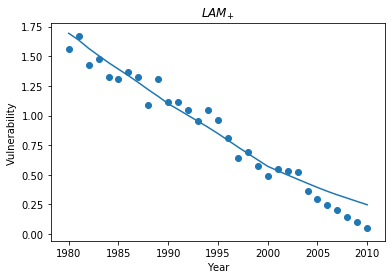

In [8]:
# show vulnerability for R+ Region (compare with Fig. SI1 and SI2)
plt.plot(mod_med.loc[mod_med['Year'] > 1979, 'Year'], mod_med.loc[mod_med['Year'] > 1979, 'vul_funcSSA11Pos'],
         label = 'vulnerability function')
plt.scatter(mod_med.loc[mod_med['Year'] > 1979, 'Year'], mod_med.loc[mod_med['Year'] > 1979, 'ratiosPos'],
           label = 'ratio')
plt.title('$LAM_{+}$')
plt.xlabel('Year')
plt.ylabel('Vulnerability')

Text(0, 0.5, 'Vulnerability')

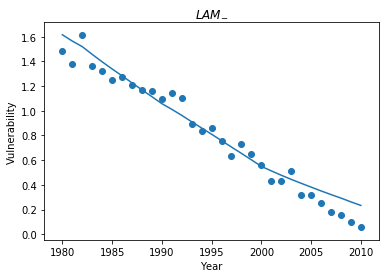

In [9]:
# show vulnerability for R- subregion
plt.plot(mod_med.loc[mod_med['Year'] > 1979, 'Year'], mod_med.loc[mod_med['Year'] > 1979, 'vul_funcSSA11Neg'])
plt.scatter(mod_med.loc[mod_med['Year'] > 1979, 'Year'], mod_med.loc[mod_med['Year'] > 1979, 'ratiosNeg'])
plt.title('$LAM_{-}$')
plt.xlabel('Year')
plt.ylabel('Vulnerability')

We see a strictly linear vulnerability drop here, this was expected as we calculated the dummy observed datas as a linearly decreasing function in dependence of D_CliExp function.

In [10]:
def adjust_dam(data, vul_func, dis):
    """
    This functions adjusts modeled damages for vulnerability changes using
    vulnerability functions
    ----------
    data : DataFrame
        DataFrame with modeled damages
    vul_func : np.array
        time dependent vulnerability function
    dis : string
        discharge group

    Returns
    -------
    np.arrays
        Full model, damages after accounting for vulnerability

    """
    vul_func = vul_func/vul_func.max()

    predicted_damages = data['D_CliExp_{}'.format(dis)] * vul_func
    predicted_damages = predicted_damages.replace([-np.inf, np.inf],
                                                  [np.nan, np.nan])
    predicted_damages_1thrd = data['D_CliExp_{}_onethird_quantile'.format(dis)] * vul_func
    predicted_damages_1thrd = predicted_damages_1thrd.replace([-np.inf, np.inf],
                                                  [np.nan, np.nan])
    predicted_damages_2thrd = data['D_CliExp_{}_twothird_quantile'.format(dis)] * vul_func
    predicted_damages_2thrd = predicted_damages.replace([-np.inf, np.inf],
                                                  [np.nan, np.nan])

    return predicted_damages, predicted_damages_1thrd, predicted_damages_2thrd

In [11]:
# finally we adjust D_CliExp to derive D_Full
pred_dam_pos, pred_dam_pos_1thrd, pred_dam_pos_2thrd = adjust_dam(mod_med[mod_med['Year'] > 1979], ssa_11Pos, 'Pos')
pred_dam_neg, pred_dam_neg_1thrd, pred_dam_neg_2thrd= adjust_dam(mod_med[mod_med['Year'] > 1979], ssa_11Neg, 'Neg')

# add it to our data frame
mod_med.loc[mod_med['Year'] > 1979,'D_Full_Pos'] = pred_dam_pos
mod_med.loc[mod_med['Year'] > 1979,'D_Full_Neg'] = pred_dam_neg

mod_med.loc[mod_med['Year'] > 1979,'D_Full_Pos_onethird_quantile'] = pred_dam_pos_1thrd
mod_med.loc[mod_med['Year'] > 1979,'D_Full_Neg_onethird_quantile'] = pred_dam_neg_1thrd

mod_med.loc[mod_med['Year'] > 1979,'D_Full_Pos_twothird_quantile'] = pred_dam_pos_2thrd
mod_med.loc[mod_med['Year'] > 1979,'D_Full_Neg_twothird_quantile'] = pred_dam_neg_2thrd

mod_med

,Unnamed: 0,Year,Region,D_CliExp_Pos,D_CliExp_Neg,D_1980_Pos,D_1980_Neg,D_2010_Pos,D_2010_Neg,D_obs_dummy_Pos,...,ratiosPos,ratiosNeg,vul_funcSSA11Pos,vul_funcSSA11Neg,D_Full_Pos,D_Full_Neg,D_Full_Pos_onethird_quantile,D_Full_Neg_onethird_quantile,D_Full_Pos_twothird_quantile,D_Full_Neg_twothird_quantile
0,0,1971,LAM,4.023693e+08,5.285264e+08,6.360281e+08,1.047591e+09,1.251272e+09,3.859332e+09,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1972,LAM,6.467142e+08,7.232123e+08,1.028985e+09,1.028685e+09,2.866084e+09,3.587172e+09,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1973,LAM,8.151027e+08,1.165546e+09,1.210916e+09,1.800896e+09,3.123314e+09,6.070501e+09,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1974,LAM,2.469297e+08,5.895776e+09,3.416155e+08,8.737634e+09,9.556804e+08,3.003573e+10,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1975,LAM,7.356679e+08,1.252483e+09,9.627596e+08,1.854030e+09,2.283276e+09,5.245553e+09,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1976,LAM,5.690548e+08,1.089701e+09,7.273545e+08,1.525657e+09,1.588228e+09,4.114654e+09,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1977,LAM,5.887558e+08,7.184427e+08,6.765118e+08,8.721162e+08,1.528850e+09,3.321514e+09,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1978,LAM,5.674043e+08,1.005163e+09,6.727797e+08,1.187181e+09,1.539537e+09,3.648889e+09,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1979,LAM,9.428826e+08,6.272667e+09,1.009824e+09,6.594910e+09,2.677416e+09,2.195303e+10,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1980,LAM,6.909657e+08,6.501249e+09,6.909657e+08,6.501249e+09,1.854897e+09,2.347668e+10,1.078941e+09,...,1.561498,1.487399,1.693229,1.615420,6.909657e+08,6.501249e+09,6.875338e+08,5.976350e+09,6.909657e+08,6.501249e+09


In [40]:
def normalise(dataFrame):
    """
    Normalisation of time series. Normalisation for trends estimation
    normalises everything to total observed damage. Normalisation for plotting
    shifts time series to the same starting point in 1980.
    ----------
    region : string
        Abbrevation of region
    dataFrame : DataFrame
        Time series

    Returns
    -------
    dataFrame : DataFrame
        Time series + normalised time series

    """

    for dis in ['Pos','Neg']:
        # normalise full model to observed damages
        # define norm facor
        norm_fac = dataFrame.loc[dataFrame['Year'] > 1979, 'D_obs_dummy_{}'.format(dis)].mean() / \
        dataFrame.loc[dataFrame['Year'] > 1979, 'D_Full_{}'.format(dis)].mean()

        dataFrame['Norm_D_Full_{}'.format(dis)] = dataFrame['D_Full_{}_onethird_quantile'.format(dis)] * norm_fac

        dataFrame['Norm_D_Full_{}'.format(dis)] = dataFrame['D_Full_{}_twothird_quantile'.format(dis)] * norm_fac

        # initialise model in 1980

        start_fac = dataFrame.loc[dataFrame['Year'] == 1980, 'D_Full_{}'.format(dis)].sum() / \
            dataFrame.loc[dataFrame['Year'] == 1980, 'D_CliExp_{}'.format(dis)].sum()

        for col_name in ['','_onethird_quantile', '_twothird_quantile']:

            dataFrame['Norm_D_1980_{}{}'.format(dis,col_name)] = dataFrame['D_1980_{}{}'.format(dis,col_name)] * start_fac * norm_fac

            dataFrame['Norm_D_2010_{}{}'.format(dis,col_name)] = dataFrame['D_2010_{}{}'.format(dis,col_name)] * start_fac * norm_fac

            dataFrame['Norm_D_CliExp_{}{}'.format(dis,col_name)] = dataFrame['D_CliExp_{}{}'.format(dis,col_name)] * start_fac* norm_fac
        
    return dataFrame

Text(0, 0.5, 'LOG10 Damage')

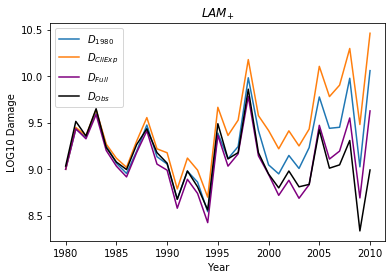

In [41]:
# Normalise data to start 1980 and to observed damages
norm_data = normalise(mod_med)

# plot data for LAM Pos
norm_data_1980 = norm_data[norm_data['Year']>1979]

plt.plot(norm_data_1980['Year'],np.log10(norm_data_1980['Norm_D_1980_Pos']), label = '$D_{1980}$')
plt.plot(norm_data_1980['Year'],np.log10(norm_data_1980['Norm_D_CliExp_Pos']), label = '$D_{CliExp}$')
plt.plot(norm_data_1980['Year'],np.log10(norm_data_1980['Norm_D_Full_Pos']), color = 'purple',label = '$D_{Full}$')
plt.plot(norm_data_1980['Year'],np.log10(norm_data_1980['D_obs_dummy_Pos']), color = 'k', label = '$D_{Obs}$')
plt.legend()

plt.title('$LAM_{+}$')
plt.xlabel('Year')
plt.ylabel('LOG10 Damage')


Text(0, 0.5, 'LOG10 Damage')

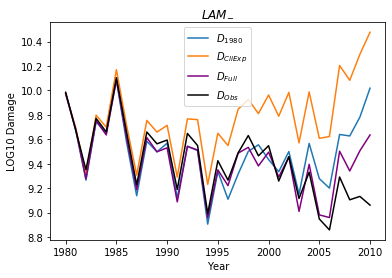

In [42]:
# plot data for LAM Pos
norm_data_1980 = norm_data[norm_data['Year']>1979]

plt.plot(norm_data_1980['Year'],np.log10(norm_data_1980['Norm_D_1980_Neg']), label = '$D_{1980}$')
plt.plot(norm_data_1980['Year'],np.log10(norm_data_1980['Norm_D_CliExp_Neg']), label = '$D_{CliExp}$')
plt.plot(norm_data_1980['Year'],np.log10(norm_data_1980['Norm_D_Full_Neg']), color = 'purple',label = '$D_{Full}$')
plt.plot(norm_data_1980['Year'],np.log10(norm_data_1980['D_obs_dummy_Neg']), color = 'k', label = '$D_{Obs}$')
plt.legend()

plt.title('$LAM_{-}$')
plt.xlabel('Year')
plt.ylabel('LOG10 Damage')


Now, we have added D_Full to the data frame and are now ready for the attbribution assessment with the
three time series accounting for all drivers:

D_1980... - Time series only accounting for changes in climate (fixed 1980 socio-economic conditions)
    
D_CliExp... - Time series accounting for changes in climate and exposure

D_Full... - Time series accounting for changes in climate, exposure and vulnerability

addtionally we have the second fixed expossure simulation:

D_2010... - Time series only accounting for changes in climate (fixed 1980 socio-economic conditions)

In [44]:
# we can save it for the reuse in 'DemoAttributionAssessment.ipynb'

norm_data.to_csv('~/projects/NC_Submission/Climada_papers/Test/DEMO_VulnerabilityTimeSeriesSubregions.csv')